In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False



In [2]:
df = pd.read_csv('data/고구마2017_2021.csv', encoding='euc-kr')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,날짜,고구마가격,평균기온,최고기온,최저기온,강수량,일조시간,일사량,습도,거래량(톤),...,보통휘발유,자동차용경유,소비자물가,농축수산물,공업제품,집세,공공서비스,개인서비스,근원물가,생활물가
0,2017.1.2,4442,5.974375,11.465000,1.304375,0.575000,4.380000,6.568667,76.789375,2.1000,...,1487.92,1281.55,2.2,10.4,1.6,1.7,1.1,2.9,1.6,2.6
1,2017.1.3,4463,4.116250,9.984375,-0.219375,0.500000,8.215625,9.433333,64.767500,23.7600,...,1492.17,1285.44,2.2,10.4,1.6,1.7,1.1,2.9,1.6,2.6
2,2017.1.4,4461,4.473750,10.685000,-0.176250,0.500000,6.876250,8.030667,66.348750,21.7900,...,1495.37,1288.66,2.2,10.4,1.6,1.7,1.1,2.9,1.6,2.6
3,2017.1.5,4430,4.888750,9.026250,0.303750,18.614286,1.143333,4.212000,71.096875,20.9900,...,1497.70,1290.76,2.2,10.4,1.6,1.7,1.1,2.9,1.6,2.6
4,2017.1.6,4423,5.891875,11.055625,2.035000,3.160000,5.939375,8.042000,68.124375,15.3575,...,1499.65,1292.58,2.2,10.4,1.6,1.7,1.1,2.9,1.6,2.6


In [3]:
# 데이터 크기 확인
df.shape

(1226, 21)

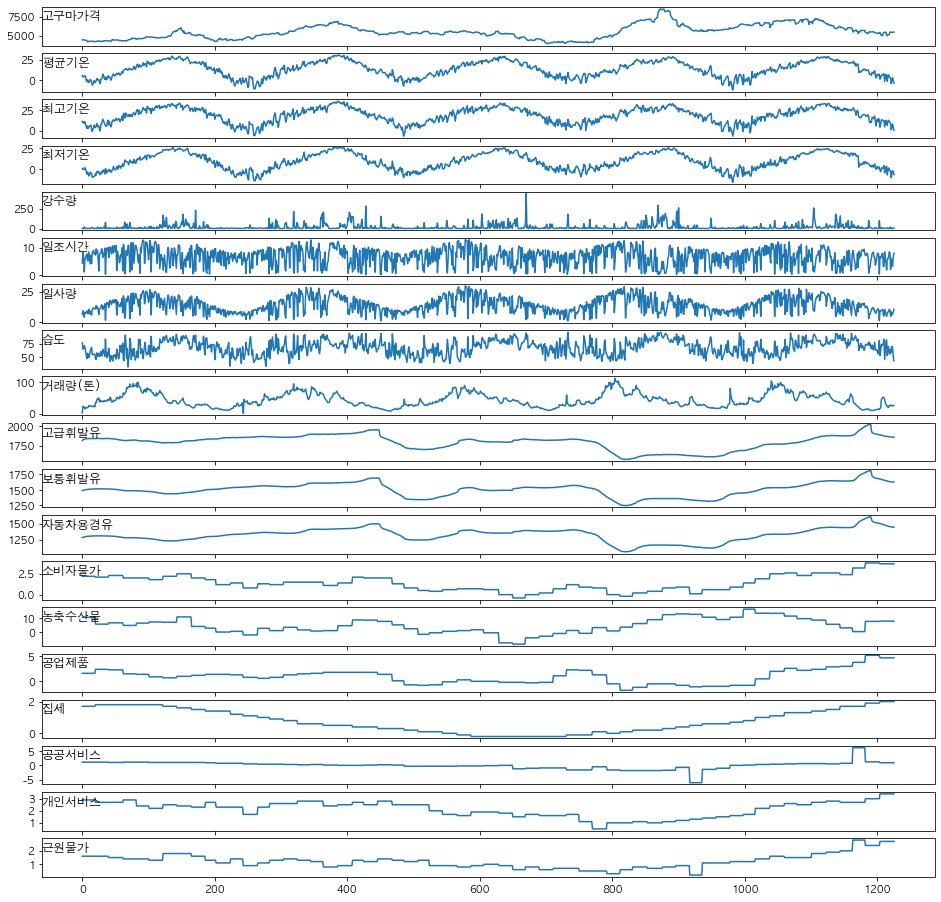

In [4]:
# 피쳐 추세 시각화 
values = df.values
# specify columns to plot
groups = range(1, 20)
i = 1
# plot each column
plt.figure(figsize=(16,16))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='left')
	i += 1
plt.show()

In [5]:
# 피처와 타겟 구분
x = df.drop(['고구마가격', '날짜'], axis=1)
y = df[['고구마가격']]

In [6]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# test, train 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((858, 19), (368, 19), (858, 1), (368, 1))

Feature Ranking:
1. feature 농축수산물 (0.344)
2. feature 고급휘발유 (0.170)
3. feature 거래량(톤) (0.115)
4. feature 공공서비스 (0.095)
5. feature 공업제품 (0.082)
6. feature 집세 (0.051)
7. feature 개인서비스 (0.037)
8. feature 자동차용경유 (0.033)
9. feature 보통휘발유 (0.018)
10. feature 평균기온 (0.012)
11. feature 최저기온 (0.011)
12. feature 최고기온 (0.009)
13. feature 생활물가 (0.005)
14. feature 습도 (0.004)
15. feature 근원물가 (0.004)
16. feature 소비자물가 (0.003)
17. feature 강수량 (0.002)
18. feature 일사량 (0.002)
19. feature 일조시간 (0.002)


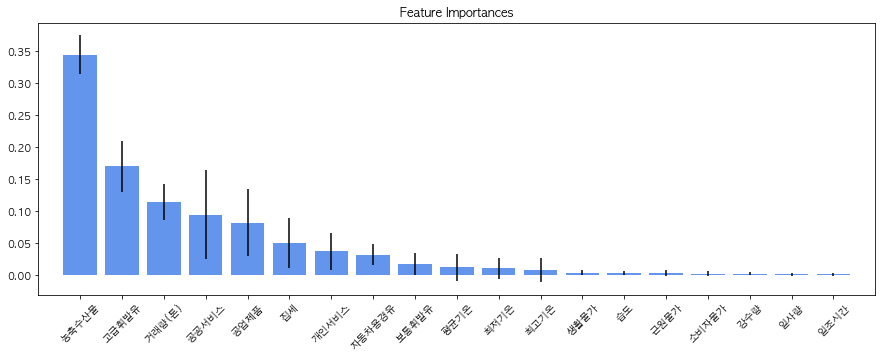

In [8]:
# 타겟 데이터에 영향을 주는 피처 중요도
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature Ranking:')

for f in range(x_train.shape[1]):
    print('{}. feature {} ({:.3f})'.format(f+1, x_train.columns[indices][f], importances[indices[f]]))

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.bar(range(x_train.shape[1]), importances[indices], color='cornflowerblue', yerr=std[indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=45)
plt.xlim([-1, x_train.shape[1]])
plt.show()

## LinerRegression

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
pred_lin=lin_reg.predict(x_test)
print(f'LinearRegressor Score: {lin_reg.score(x_test, y_test):.3f}')
print(f'LinearRegressor MAE: {metrics.mean_absolute_error(y_test, pred_lin):.3f}')
print(f'LinearRegressor MSE: {metrics.mean_squared_error(y_test, pred_lin):.3f}')
print(f'LinearRegressor RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_lin)):.3f}')
print('='*30)





LinearRegressor Score: 0.778
LinearRegressor MAE: 355.847
LinearRegressor MSE: 191950.731
LinearRegressor RMSE: 438.122


## Ridge

In [10]:
from sklearn.model_selection import GridSearchCV

#Ridge without GridSearchCV

ridge = Ridge(alpha=0.1, random_state=0)
ridge.fit(x_train, y_train)
pred_ridge=ridge.predict(x_test)

#GridSearchCV hyperparameter tuning

params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
Ridge_model_GS = GridSearchCV(ridge, param_grid=params_Ridge)
Ridge_model_GS.fit(x_train,y_train)


GridSearchCV(estimator=Ridge(alpha=0.1, random_state=0),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})

In [11]:
Ridge_model_GS.best_params_

{'alpha': 0.1}

In [12]:
#Training Ridge With Best Hyperparameters


# fitting model
Ridge_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_ridge=Ridge_model_GS.predict(x_test)

print(f'Ridge Score: {ridge.score(x_test, y_test):.3f}')
print(f'Ridge MAE: {metrics.mean_absolute_error(y_test, pred_ridge):.3f}')
print(f'Ridge MSE: {metrics.mean_squared_error(y_test, pred_ridge):.3f}')
print(f'Ridge RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)):.3f}')
print('='*30)
print(f'Ridge_GS score:{Ridge_model_GS.best_score_:.3f}')
print(f'Ridge_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_ridge):.3f}')
print(f'Ridge_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_ridge):.3f}')
print(f'Ridge_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_ridge)):.3f}')


Ridge Score: 0.778
Ridge MAE: 355.682
Ridge MSE: 191829.055
Ridge RMSE: 437.983
Ridge_GS score:0.758
Ridge_GS MAE: 355.682
Ridge_GS MSE: 191829.055
Ridge_GS RMSE: 437.983



## Lasso

In [13]:
#Ridge without GridSearchCV
lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(x_train, y_train)
pred_lasso=lasso.predict(x_test)

#GridSearchCV hyperparameter tuning

params_Lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0]}
Lasso_model_GS = GridSearchCV(lasso, param_grid=params_Lasso)
Lasso_model_GS.fit(x_train,y_train)


GridSearchCV(estimator=Lasso(alpha=0.1, random_state=0),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})

In [14]:
Lasso_model_GS.best_params_

{'alpha': 0}

In [15]:
#Training Lasso with Best Hyperparameters

# fitting model
Lasso_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_lasso=Lasso_model_GS.predict(x_test)

print(f'Lasso Score: {lasso.score(x_test, y_test):.3f}')
print(f'Lasso MAE: {metrics.mean_absolute_error(y_test, pred_lasso):.3f}')
print(f'Lasso MSE: {metrics.mean_squared_error(y_test, pred_lasso):.3f}')
print(f'Lasso RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)):.3f}')
print('='*30)
print(f'Lasso_GS score:{Lasso_model_GS.best_score_:.3f}')
print(f'Lasso_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_lasso):.3f}')
print(f'Lasso_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_lasso):.3f}')
print(f'Lasso_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_lasso)):.3f}')


Lasso Score: 0.778
Lasso MAE: 355.767
Lasso MSE: 191794.873
Lasso RMSE: 437.944
Lasso_GS score:0.758
Lasso_GS MAE: 355.895
Lasso_GS MSE: 191926.219
Lasso_GS RMSE: 438.094


## SVM 

In [16]:
# SVM 회귀모델 라이브러리
from sklearn.svm import LinearSVR, SVR

# LinearSVR
lin_svr = LinearSVR(epsilon=0.5, random_state=0)
lin_svr.fit(x_train, y_train)
print(f'LinearSVR Score: {lin_svr.score(x_test, y_test):.3f}')

# SVR
svr = SVR(C=100, epsilon=0.5)
svr.fit(x_train, y_train)
print(f'SVR Score: {svr.score(x_test, y_test):.3f}')

LinearSVR Score: 0.469
SVR Score: 0.005


## DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor without GridSearchCV

dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)
pred_dt=dt_reg.predict(x_test)

#GridSearchCV hyperparameter tuning

params_dt={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
DT_model_GS=GridSearchCV(dt_reg,param_grid=params_dt)
DT_model_GS.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [18]:
DT_model_GS.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [19]:
#Training Decision Tree With Best Hyperparameters

# fitting model
DT_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_dt=DT_model_GS.predict(x_test)

print(f'DecisionTree Score: {dt_reg.score(x_test, y_test):.3f}')
print(f'DecisionTree MAE: {metrics.mean_absolute_error(y_test, pred_dt):.3f}')
print(f'DecisionTree MSE: {metrics.mean_squared_error(y_test, pred_dt):.3f}')
print(f'DecisionTree RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_dt)):.3f}')
print('='*30)
print(f'DecisionTree_GS score:{DT_model_GS.best_score_:.3f}')
print(f'DecisionTree_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_dt):.3f}')
print(f'DecisionTree_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_dt):.3f}')
print(f'DecisionTree_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_dt)):.3f}')


DecisionTree Score: 0.950
DecisionTree MAE: 119.236
DecisionTree MSE: 43204.514
DecisionTree RMSE: 207.857
DecisionTree_GS score:0.703
DecisionTree_GS MAE: 378.003
DecisionTree_GS MSE: 273982.653
DecisionTree_GS RMSE: 523.434


## BaggingRegressor

In [20]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, VotingRegressor

#  BaggingRegressor without GridSearchCV
bag_reg=BaggingRegressor(DecisionTreeRegressor(), random_state=0)
bag_reg.fit(x_train, y_train)
pred_bag=bag_reg.predict(x_test)

#GridSearchCV hyperparameter tuning

params_bag_GS = {"n_estimators": [50,100,200],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
              "bootstrap": [True, False],
              "bootstrap_features": [True, False]}
Bag_model_GS = GridSearchCV(bag_reg, param_grid=params_bag_GS)
Bag_model_GS.fit(x_train,y_train)




GridSearchCV(estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        random_state=0),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1, 2, 4, 6, 8],
                         'max_samples': [0.5, 0.1],
                         'n_estimators': [50, 100, 200]})

In [21]:
Bag_model_GS.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 8,
 'max_samples': 0.5,
 'n_estimators': 100}

In [22]:
#Training Decision Tree With Best Hyperparameters

# fitting model
Bag_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_bag=Bag_model_GS.predict(x_test)

print(f'Bagging Score: {dt_reg.score(x_test, y_test):.3f}')
print(f'Bagging MAE: {metrics.mean_absolute_error(y_test, pred_bag):.3f}')
print(f'Bagging MSE: {metrics.mean_squared_error(y_test, pred_bag):.3f}')
print(f'Bagging RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_bag)):.3f}')
print('='*30)
print(f'Bagging_GS score:{Bag_model_GS.best_score_:.3f}')
print(f'Bagging_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_bag):.3f}')
print(f'Bagging_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_bag):.3f}')
print(f'Bagging_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_bag)):.3f}')

Bagging Score: 0.950
Bagging MAE: 102.190
Bagging MSE: 25597.975
Bagging RMSE: 159.994
Bagging_GS score:0.969
Bagging_GS MAE: 109.999
Bagging_GS MSE: 26375.562
Bagging_GS RMSE: 162.406


### RandomForestRegressor

In [23]:
#  RandomForestRegressor without GridSearchCV
rf_reg=RandomForestRegressor(random_state=0)
rf_reg.fit(x_train, y_train)
pred_rf=rf_reg.predict(x_test)

#GridSearchCV hyperparameter tuning

params_RF = {"max_depth": [3,5,6,7,8,9],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3,5,7],
              "min_samples_leaf": [1, 3,5,6]}
RF_model_GS = GridSearchCV(rf_reg, param_grid=params_RF)
RF_model_GS.fit(x_train,y_train)


GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 6],
                         'min_samples_split': [2, 3, 5, 7]})

In [24]:
RF_model_GS.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [25]:
#Training Decision Tree With Best Hyperparameters

# fitting model
RF_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_rf=RF_model_GS.predict(x_test)

print(f'RandomForestRegressor Score: {rf_reg.score(x_test, y_test):.3f}')
print(f'RandomForestRegressor MAE: {metrics.mean_absolute_error(y_test, pred_rf):.3f}')
print(f'RandomForestRegressor MSE: {metrics.mean_squared_error(y_test, pred_rf):.3f}')
print(f'RandomForestRegressor RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_rf)):.3f}')
print('='*30)
print(f'RandomForestRegressor_GS score:{RF_model_GS.best_score_:.3f}')
print(f'RandomForestRegressor_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_rf):.3f}')
print(f'RandomForestRegressor_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_rf):.3f}')
print(f'RandomForestRegressor_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_rf)):.3f}')

RandomForestRegressor Score: 0.969
RandomForestRegressor MAE: 103.339
RandomForestRegressor MSE: 26906.991
RandomForestRegressor RMSE: 164.034
RandomForestRegressor_GS score:0.970
RandomForestRegressor_GS MAE: 112.469
RandomForestRegressor_GS MSE: 27343.360
RandomForestRegressor_GS RMSE: 165.358


### AdaBoostRegressor

In [26]:
#  AdaBoostRegressor without GridSearchCV

ada_reg=AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
ada_reg.fit(x_train, y_train)
pred_ada=ada_reg.predict(x_test)

# GridSearchCV hyperparameter tuning

params_AdaR = {'learning_rate':[0.05,0.1,0.2,0.6,0.8,1],
                  'n_estimators': [50,60,100],
                  'loss' : ['linear', 'square', 'exponential']}
Adar_model_GS = GridSearchCV(ada_reg, param_grid=params_AdaR)
Adar_model_GS.fit(x_train,y_train)



GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                         random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.6, 0.8, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 100]})

In [27]:
Adar_model_GS.best_params_

{'learning_rate': 0.6, 'loss': 'exponential', 'n_estimators': 100}

In [28]:
#Training Decision Tree With Best Hyperparameters

# fitting model
Adar_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_adar=Adar_model_GS.predict(x_test)

print(f'AdaBoostRegressor Score: {ada_reg.score(x_test, y_test):.3f}')
print(f'AdaBoostRegressor MAE: {metrics.mean_absolute_error(y_test, pred_ada):.3f}')
print(f'AdaBoostRegressor MSE: {metrics.mean_squared_error(y_test, pred_ada):.3f}')
print(f'AdaBoostRegressor RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_ada)):.3f}')
print('='*30)
print(f'AdaBoostRegressor_GS score:{Adar_model_GS.best_score_:.3f}')
print(f'AdaBoostRegressor_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_adar):.3f}')
print(f'AdaBoostRegressor_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_adar):.3f}')
print(f'AdaBoostRegressor_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_adar)):.3f}')

AdaBoostRegressor Score: 0.968
AdaBoostRegressor MAE: 94.043
AdaBoostRegressor MSE: 27791.429
AdaBoostRegressor RMSE: 166.708
AdaBoostRegressor_GS score:0.971
AdaBoostRegressor_GS MAE: 93.321
AdaBoostRegressor_GS MSE: 27947.886
AdaBoostRegressor_GS RMSE: 167.176


### VotingRegressor

In [29]:
#  Voting without GridSearchCV
voting_models = [('lin_reg', lin_reg),
                 ('ridge', ridge),
                 ('lasso', lasso),
                 ('lin_svr', lin_svr),
                 ('svr', svr),
                 ('dt_reg', dt_reg),
                 ('bag_reg', bag_reg),
                 ('rf_reg', rf_reg),
                 ('ada_reg', ada_reg)]

voting_reg = VotingRegressor(estimators=voting_models, n_jobs=-1)
voting_reg.fit(x_train, y_train)
pred_vt=voting_reg.predict(x_test)

# GridSearchCV hyperparameter tuning

params_vt = {
                'weights':[(1,1,1,1,1,1,1,1,1), (2,1,1,1,1,1,1,1,1), 
                         (1,2,1,1,1,1,1,1,1), (1,1,2,1,1,1,1,1,1),
                         (1,1,1,2,1,1,1,1,1), (1,1,1,1,2,1,1,1,1), 
                         (1,1,1,1,1,2,1,1,1), (1,1,1,1,1,1,2,1,1), 
                         (1,1,1,1,1,1,1,2,1), (1,1,1,1,1,1,1,1,2)]}
Vt_model_GS = GridSearchCV(voting_reg, param_grid=params_vt)
Vt_model_GS.fit(x_train, y_train)




/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.443e+07, tolerance: 7.277e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.212e+07, tolerance: 5.629e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.212e+07, tolerance: 5.629e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.212e+07, tolerance: 5.629e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

GridSearchCV(estimator=VotingRegressor(estimators=[('lin_reg',
                                                    LinearRegression()),
                                                   ('ridge',
                                                    Ridge(alpha=0.1,
                                                          random_state=0)),
                                                   ('lasso',
                                                    Lasso(alpha=0.1,
                                                          random_state=0)),
                                                   ('lin_svr',
                                                    LinearSVR(epsilon=0.5,
                                                              random_state=0)),
                                                   ('svr',
                                                    SVR(C=100, epsilon=0.5)),
                                                   ('dt_reg',
                                   

In [30]:
Vt_model_GS.best_params_

{'weights': (1, 1, 1, 1, 1, 1, 1, 1, 2)}

In [31]:
#Training Decision Tree With Best Hyperparameters

# fitting model
Vt_model_GS.fit(x_train,y_train)
#Prediction
tuned_pred_vt=Vt_model_GS.predict(x_test)

print(f'VotingRegressor Score: {voting_reg.score(x_test, y_test):.3f}')
print(f'VotingRegressor MAE: {metrics.mean_absolute_error(y_test, pred_vt):.3f}')
print(f'VotingRegressor MSE: {metrics.mean_squared_error(y_test, pred_vt):.3f}')
print(f'VotingRegressor RMSE: {np.sqrt(metrics.mean_squared_error(y_test, pred_vt)):.3f}')
print('='*30)
print(f'VotingRegressor_GS score:{Vt_model_GS.best_score_:.3f}')
print(f'VotingRegressor_GS MAE: {metrics.mean_absolute_error(y_test, tuned_pred_vt):.3f}')
print(f'VotingRegressor_GS MSE: {metrics.mean_squared_error(y_test, tuned_pred_vt):.3f}')
print(f'VotingRegressor_GS RMSE: {np.sqrt(metrics.mean_squared_error(y_test, tuned_pred_vt)):.3f}')

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.401e+07, tolerance: 5.972e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.401e+07, tolerance: 5.972e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.401e+07, tolerance: 5.972e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.809e+07, tolerance: 5.904e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.401e+07, tolerance: 5.972e+04
  model = cd_fast.enet_coordinate_descent(
/Users/ENJET1/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: Co

VotingRegressor Score: 0.893
VotingRegressor MAE: 239.052
VotingRegressor MSE: 92733.122
VotingRegressor RMSE: 304.521
VotingRegressor_GS score:0.905
VotingRegressor_GS MAE: 220.629
VotingRegressor_GS MSE: 79760.926
VotingRegressor_GS RMSE: 282.420


예제: https://www.datavedas.com/regression-problems-in-python/

### 회귀 평가 지표
- MAE
- MSE
- RMSE: MSE 함수에 squared=False를 이용하여 계산
- MSLE
- R^2

### 평가 함수
- cross_val_score
- GridSearchCV
- 평가지표는 값이 작을수록 좋은 것, scoring 함수는 값이 클수록 좋은 것이기 때문에 함수에 평가지표를 적용할 때에는 neg_를 붙여 보정이 필요함

score 비교:

Ridge: 0.778 -> 0.758\
Lasso: 0.778 -> 0.758\
DecisionTreeRegression: 0.905 -> 0.703\
Bagging: 0.950 -> 0.969\
RandomForestRegressor: 0.969 -> 0.970\
AdaBoostRegressor: 0.968 -> 0.971\
VotingRegressor: 0.893 -> 0.905

GridSearchCV 적용후 Bagging, RandomForestRegressor, AdaBoostRegressor model의 score 증가\
최적의 선형회귀 모델 AdaBoostRegresso 보임